In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [3]:
datasets =['AAPL', 'SPY']
for dataset in datasets:
    Ticker= yf.Ticker(dataset)
    data = Ticker.history(start='2023-01-01', end='2023-12-31')
    filename= f"{dataset}_data.csv"
    data.to_csv(filename)
    print(f"Download for data {dataset} and saved as {filename}")

Download for data AAPL and saved as AAPL_data.csv
Download for data SPY and saved as SPY_data.csv


In [4]:
Ticker = 'AAPL'
start_date = '2023-01-01'
end_date = '2023-12-31'
data = yf.download(Ticker, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [5]:
Market = 'SPY'
start_date = '2023-01-01'
end_date ='2023-12-31'
Stock = yf.download(Market, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [6]:
Stock

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,384.369995,386.429993,377.829987,380.820007,376.639587,74850700
2023-01-04,383.179993,385.880005,380.000000,383.760010,379.547333,85934100
2023-01-05,381.720001,381.839996,378.760010,379.380005,375.215393,76970500
2023-01-06,382.609985,389.250000,379.410004,388.079987,383.819885,104189600
2023-01-09,390.369995,393.700012,387.670013,387.859985,383.602295,73978100
...,...,...,...,...,...,...
2023-10-23,419.609985,424.450012,417.799988,420.459991,420.459991,92035100
2023-10-24,422.649994,424.820007,420.739990,423.630005,423.630005,78564200
2023-10-25,421.890015,421.920013,417.019989,417.549988,417.549988,94223200


In [7]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,124.538658,112117500
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.823189,89113600
2023-01-05,127.129997,127.769997,124.760002,125.019997,124.488869,80962700
2023-01-06,126.010002,130.289993,124.889999,129.619995,129.069336,87754700
2023-01-09,130.470001,133.410004,129.889999,130.149994,129.597076,70790800
...,...,...,...,...,...,...
2023-10-23,170.910004,174.009995,169.929993,173.000000,173.000000,55980100
2023-10-24,173.050003,173.669998,171.449997,173.440002,173.440002,43816600
2023-10-25,171.880005,173.059998,170.649994,171.100006,171.100006,57157000


## **CAPM 2021**

In [8]:
data_ret = data['Adj Close'].pct_change().dropna()
Stock_ret =  Stock['Adj Close'].pct_change().dropna()

# **Treasury 10-Years** 2021 1.45%

In [9]:
Risk_free_rate = 0.0145


In [10]:
import statsmodels.api as sm

In [11]:
data_0 = data_ret - Risk_free_rate
stock_0 = Stock_ret - Risk_free_rate

In [12]:
X = sm.add_constant(stock_0)
model = sm.OLS(stock_0, X).fit()
beta= model.params[1]

In [13]:
beta

0.9999999999999997

In [14]:
expected_return = Risk_free_rate  + beta * (stock_0.mean() - Risk_free_rate)

In [15]:
expected_return

-0.014044131588240237

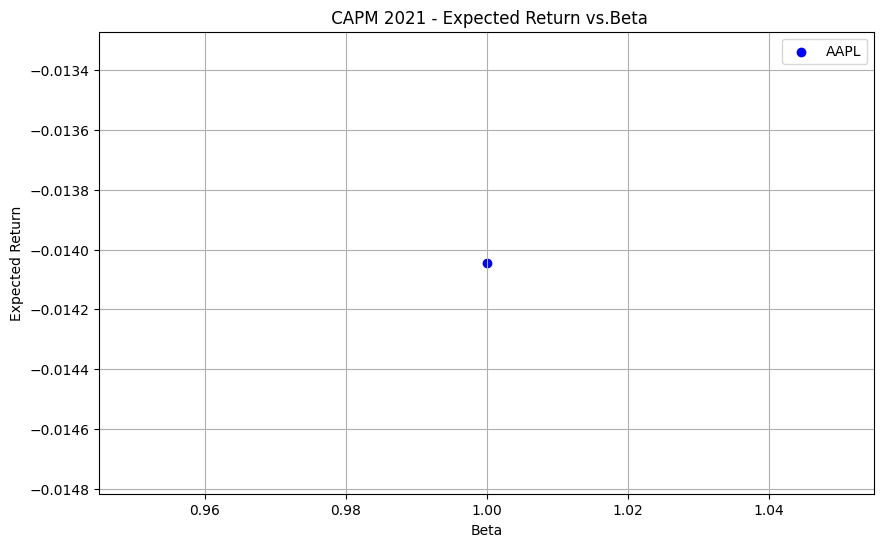

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(beta, expected_return, label=Ticker, color='blue')
plt.xlabel('Beta')
plt.ylabel('Expected Return')
plt.title(' CAPM 2021 - Expected Return vs.Beta')
plt.legend()
plt.grid(True)
plt.show()

# CAPM *2022*

In [17]:
Risk_Free = 0.0295

In [18]:
equity = data_ret - Risk_Free
equity_0 = Stock_ret - Risk_Free

In [19]:
X = sm.add_constant(equity_0)
model = sm.OLS(equity, X).fit()
beta_0 = model.params[1]

In [20]:
beta_0

1.1379074133327534

In [21]:
exp_ret = Risk_Free + beta_0 * (equity_0.mean() - Risk_Free)

In [22]:
exp_ret

-0.037117801341386786

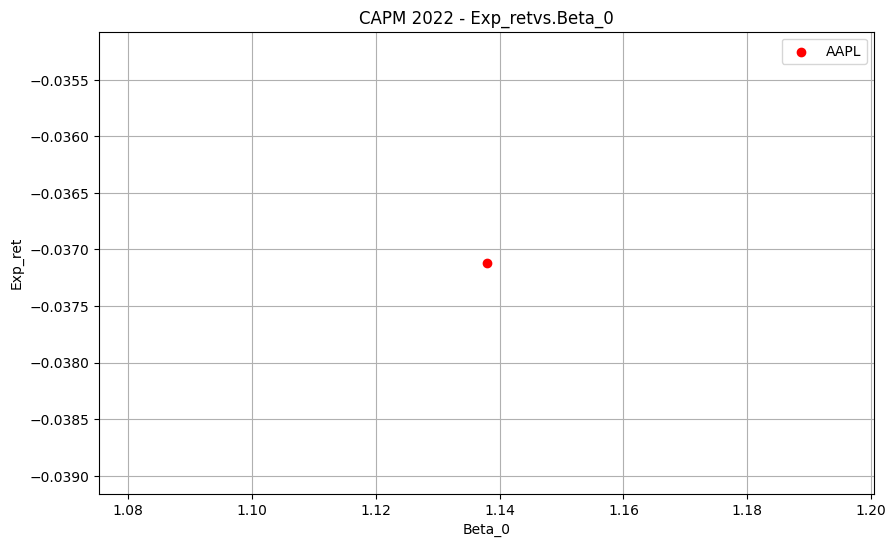

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(beta_0, exp_ret, label=Ticker, color='red')
plt.xlabel('Beta_0')
plt.ylabel('Exp_ret')
plt.title('CAPM 2022 - Exp_retvs.Beta_0')
plt.legend()
plt.grid(True)
plt.show()

In [31]:
Ris = 0.0484

In [32]:
Tick = data_ret - Ris
Tick_0 = Stock_ret - Ris

In [33]:
X = sm.add_constant(Tick_0)
model = sm.OLS(Tick, X).fit()
beta_1 = model.params[1]

In [34]:
beta_1

1.1379074133327534

In [35]:
exp_ret_1 = Ris + beta_1 * (Tick_0.mean() - Ris)

In [36]:
exp_ret_1

-0.061230701565364865

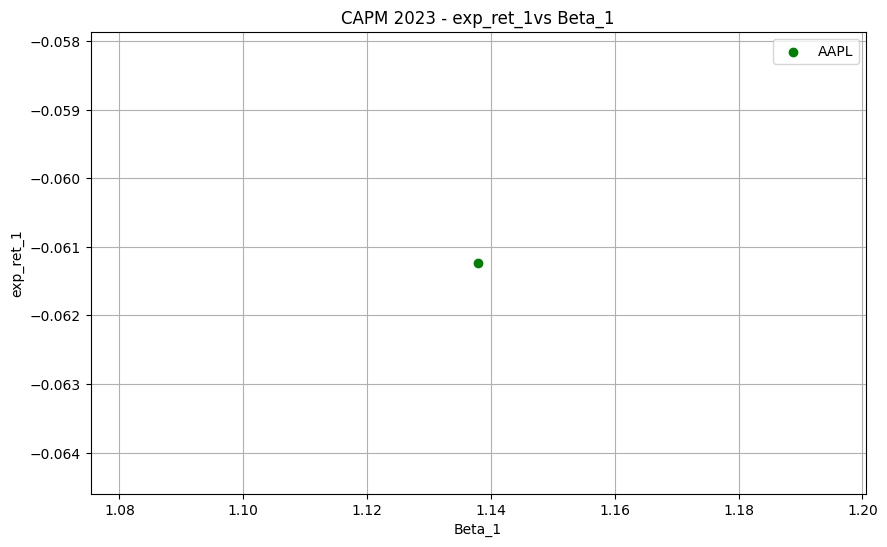

In [37]:
plt.figure(figsize=(10, 6))
plt.scatter(beta_1, exp_ret_1, label=Ticker, color='green')
plt.xlabel('Beta_1')
plt.ylabel('exp_ret_1')
plt.title('CAPM 2023 - exp_ret_1vs Beta_1')
plt.grid(True)
plt.legend()
plt.show()